# Evaluación 2

---



**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Junio 2025

**Versión:** 1.0  



---

## Descripción

Este notebook corresponde al desarrollo de la entrega 2 de la asignatura electiva de Machine Learning de DuocUC - Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- numpy (2.0.2)
- matplotlib (3.10.0)
- pandas (2.2.2)
- seaborn (0.13.2)
- sklearn (1.6.1)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import pandas as pd
print(pd.__version__)
````

In [312]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-06-18 19:50:46--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-06-18 19:50:46--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc10a1a2aae2cecc809c25b7abe9.dl.dropboxusercontent.com/cd/0/inline/Cr3MMgZrJx7wlpwR7l-v35WBWWvFJRKHLjcw_n_Ku9_RkY9jWP6Psgvr70SscTSdl2slkza8CSHhKlh0D0XwWvtC3FiUxmI2Gh0aRc9o-ehkNXsGPM6NLW4knUFh1l_Fk47AyiB_1CQ4pfIeYuzYJD63/file# [following]
--2025-06-18 19:50:46--  https://uc10a1a2aae2cecc809c25b7ab

In [313]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [364]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Fase 3 escalar
from sklearn.preprocessing import StandardScaler

#Fase 4 modelos
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

#Fase 4 algoritmo 1
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Fase 4 predicciones modelo
from sklearn.metrics import mean_squared_error, r2_score

#Fase 4 Decision Tree
from sklearn.tree import DecisionTreeRegressor

#Fase 4 modelo de clasificacion
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

#Fase 4 SVM
from sklearn.svm import SVC

#Fase 4 KNN
from sklearn.neighbors import KNeighborsClassifier

In [315]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", decimal=",", low_memory = False)
data.head(20)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0.00,33000,0.0,1099866.0,0.00,1099866.0,15080,0.00,R,0
1,2,160,H,13.0,46,143640.0,69,1,0,0,...,0.00,300000,0.0,214592.0,0.00,214592.0,83596,0.00,R,0
2,3,170,H,13.0,45,929106.0,24,1,1,0,...,0.00,216676,0.0,0.0,0.00,7400.0,0,0.00,T,0
3,4,151,H,13.0,46,172447.0,134,0,1,0,...,0.00,60000,0.0,272762.0,0.00,272762.0,10591,0.00,R,0
4,5,170,H,13.0,46,805250.0,116,0,1,1,...,0.00,272925,0.0,249562.0,0.00,75339.0,377782,0.00,R,0
5,6,170,H,13.0,47,707664.0,67,1,1,0,...,0.00,35800,0.0,35800.0,0.00,0.0,51197,0.00,R,0
6,7,811,H,13.0,48,1022833.0,21,1,0,1,...,0.00,9391,0.0,8818.0,0.00,8818.0,0,0.00,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0.00,6000,0.0,283520.0,0.00,283520.0,0,0.00,R,0
8,9,170,H,13.0,49,1171066.0,33,0,0,0,...,0.00,60000,0.0,507629.0,0.00,507629.0,0,0.00,R,1
9,10,170,M,13.0,44,964387.0,23,1,1,0,...,0.00,92583,0.0,65487.0,0.00,65487.0,12084,0.00,R,0


# Fase 0 - Cargar de los datos

# Fase 3 - Preparación de los datos

In [316]:
print(data['Fac_T12'].isnull().sum())

8251


In [317]:
# Variables seleccionadas para el modelo de regresión
selected_features_reg = ['FacCN_T12', 'Txs_T12', 'ColL1T0_T12', 'FacCCPC_T12']

# Verificar si hay valores nulos en las variables seleccionadas
print("Conteo de valores nulos en las variables seleccionadas:")
print(data[selected_features_reg].isnull().sum())

Conteo de valores nulos en las variables seleccionadas:
FacCN_T12      8251
Txs_T12        8251
ColL1T0_T12    8251
FacCCPC_T12    8251
dtype: int64


In [318]:
# Define la lista de variables seleccionadas para clasificación
features_clasificacion_final = ['ColL1TE_T05', 'ColL1TE_T02', 'ColL1TE_T04', 'ColL1TE_T03']

print("\nConteo de valores nulos en las variables de clasificación seleccionadas:")
print(data[features_clasificacion_final].isnull().sum())


Conteo de valores nulos en las variables de clasificación seleccionadas:
ColL1TE_T05    25
ColL1TE_T02    12
ColL1TE_T04    19
ColL1TE_T03    10
dtype: int64


## Tratamiento de nulos

In [319]:
mean_Fac_T12 = data['Fac_T12'].mean()
data['Fac_T12'].fillna(mean_Fac_T12, inplace=True)

# Verificar si quedan nulos en Fac_T12
print("\nConteo de valores nulos después de imputar la media en Fac_T12:")
print(data['Fac_T12'].isnull().sum())


Conteo de valores nulos después de imputar la media en Fac_T12:
0


<ipython-input-319-1343785463>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Fac_T12'].fillna(mean_Fac_T12, inplace=True)


In [320]:
for col in selected_features_reg:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)
print("\nConteo de valores nulos después de la imputación (media):")
print(data[selected_features_reg].isnull().sum())


Conteo de valores nulos después de la imputación (media):
FacCN_T12      0
Txs_T12        0
ColL1T0_T12    0
FacCCPC_T12    0
dtype: int64


<ipython-input-320-2226142878>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


In [321]:
for col in features_clasificacion_final:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)

print("\nConteo de valores nulos después de la imputación (media) en las variables de clasificación:")
print(data[features_clasificacion_final].isnull().sum())


Conteo de valores nulos después de la imputación (media) en las variables de clasificación:
ColL1TE_T05    0
ColL1TE_T02    0
ColL1TE_T04    0
ColL1TE_T03    0
dtype: int64


<ipython-input-321-1826366464>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


## Transformación de variables

In [322]:
scaler = StandardScaler()

data_scaled = data.copy()

data_scaled[selected_features_reg] = scaler.fit_transform(data_scaled[selected_features_reg])

print("\nPrimeras filas de las variables seleccionadas después del escalado:")
print(data_scaled[selected_features_reg].head())


Primeras filas de las variables seleccionadas después del escalado:
   FacCN_T12   Txs_T12  ColL1T0_T12  FacCCPC_T12
0  -0.013653  0.120431    -0.461804     0.106973
1  -0.366365 -0.462556    -0.320073     0.005230
2   0.663161  0.120431     1.294955    -0.326488
3  -0.122599  0.120431    -0.178342     0.041678
4   0.804287  0.994911     0.321630     1.393209


# Fase 4 - Modelamiento

## Modelos de regresión

### Definición de Variable objetivo

# Variable: Fac_T12

- Tipo de Variable: Numerica continua.

- Descripción: La renta representa un indicador clave de la capacidad económica de un cliente lo que la convierte en una variable relevante para el banco. Predecirla puede resultar útil para estimar el potencial económico del cliente personalizar ofertas de productos financieros y evaluar riesgos crediticios.

In [323]:
variable_objetivo_regresion = 'Fac_T12'

### Distribución de variable objetivo

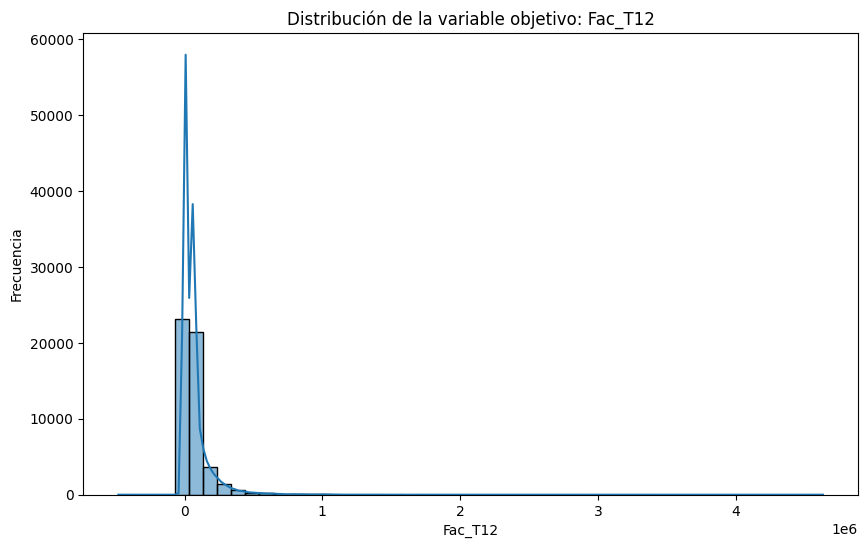

Estadísticas descriptivas de la variable objetivo:
count    5.112400e+04
mean     6.732317e+04
std      1.143171e+05
min     -4.800000e+05
25%      0.000000e+00
50%      4.227150e+04
75%      6.864000e+04
max      4.631741e+06
Name: Fac_T12, dtype: float64


In [324]:
plt.figure(figsize=(10, 6))
sns.histplot(data[variable_objetivo_regresion], kde=True, bins=50)
plt.title('Distribución de la variable objetivo: Fac_T12')
plt.xlabel('Fac_T12')
plt.ylabel('Frecuencia')
plt.show()

print(f"Estadísticas descriptivas de la variable objetivo:\n{data[variable_objetivo_regresion].describe()}")

La variable Fac_T12 presenta un total de 42,873 observaciones válidas. Su valor promedio se sitúa alrededor de 67,323, con una desviación estándar considerable de aproximadamente 124,834, lo que indica una dispersión significativa de los datos. El valor mínimo registrado es de -480,000, el cual podría ser un valor atípico o representar alguna particularidad del dato, mientras que el valor máximo alcanza aproximadamente 4,631,741. El 25% de los datos se encuentra por debajo de 0, la mediana (percentil 50%) es de aproximadamente 24,720, y el 75% de los datos es menor o igual a 84,941. Estos valores sugieren una distribución sesgada hacia la derecha, con una concentración de datos en valores más bajos y la presencia de algunos valores extremadamente altos.

### Selección de variables independientes

<ipython-input-325-3975853042>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corrs_signed_reg.index, y=top_corrs_signed_reg.values, palette="coolwarm")


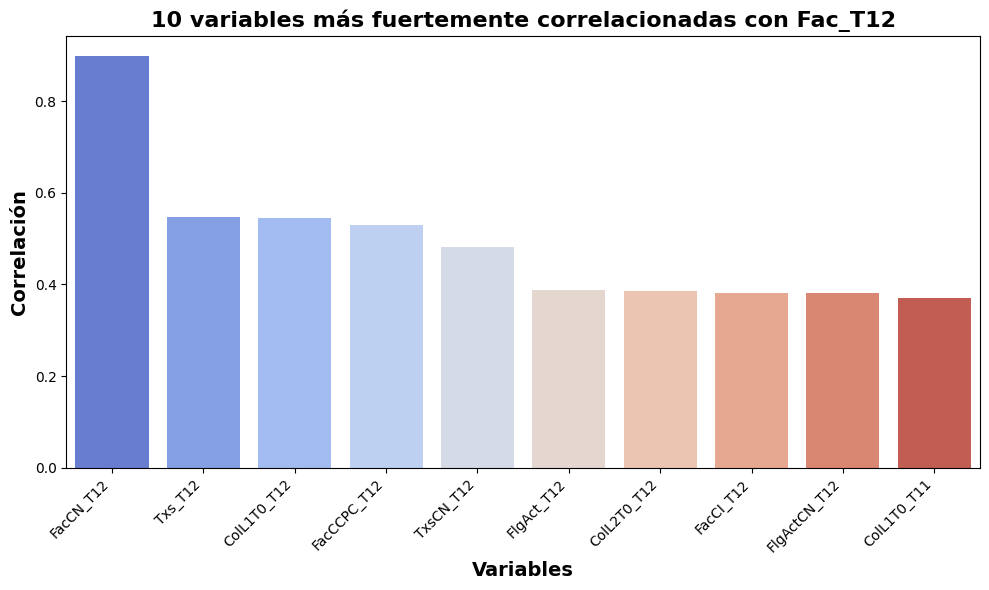


Las 10 variables más fuertemente correlacionadas con 'Fac_T12':
FacCN_T12       0.898025
Txs_T12         0.547985
ColL1T0_T12     0.544106
FacCCPC_T12     0.529156
TxsCN_T12       0.482180
FlgAct_T12      0.387802
ColL2T0_T12     0.386393
FacCI_T12       0.381615
FlgActCN_T12    0.380948
ColL1T0_T11     0.369944
Name: Fac_T12, dtype: float64


In [325]:
correlation_matrix_reg = data.corr(numeric_only=True)

corrs_reg = correlation_matrix_reg[variable_objetivo_regresion].drop(variable_objetivo_regresion).sort_values(ascending=False)

# Seleccionar las 10 variables con la correlación más fuerte (mayor valor absoluto)
N_top_corrs = 10
top_abs_corrs_reg = corrs_reg.abs().sort_values(ascending=False).head(N_top_corrs)
top_corrs_signed_reg = corrs_reg.loc[top_abs_corrs_reg.index]

# Visualizar las correlaciones principales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corrs_signed_reg.index, y=top_corrs_signed_reg.values, palette="coolwarm")
plt.title(f'{N_top_corrs} variables más fuertemente correlacionadas con {variable_objetivo_regresion}', fontsize=16, fontweight='bold')
plt.ylabel('Correlación', fontsize=14, fontweight="bold")
plt.xlabel('Variables', fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimir las correlaciones principales
print(f"\nLas {N_top_corrs} variables más fuertemente correlacionadas con '{variable_objetivo_regresion}':")
print(top_corrs_signed_reg)

las variables elegidas son FacCN_T12, Txs_T12, ColL1T0_T12 y FacCCPC_T12 debido a su alta correlación con la variable objetivo Fac_T12, siendo todas superiores a 0.5, destacando FacCN_T12 con un valor de 0.89.

### Separación datos de entrenamiento y test

In [326]:
features_regresion = ['FacCN_T12', 'Txs_T12', 'ColL1T0_T12', 'FacCCPC_T12']

X = data[features_regresion]
y = data[variable_objetivo_regresion]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (40899, 4)
Tamaño del conjunto de prueba (X_test): (10225, 4)
Tamaño del conjunto de entrenamiento (y_train): (40899,)
Tamaño del conjunto de prueba (y_test): (10225,)


### Algoritmo 1 - `Regresion Polinomial`

#### Creación del modelo

In [327]:
grado_polinomio = 2

poly_features = PolynomialFeatures(degree=grado_polinomio, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Crear el modelo de Regresión Lineal
model_poly_reg = LinearRegression()

print("Modelo de Regresión Polinomial creado (Basado en Linear Regression con características polinomiales).")
print(f"Características originales en entrenamiento: {X_train.shape[1]}")
print(f"Características transformadas en entrenamiento: {X_train_poly.shape[1]}")

Modelo de Regresión Polinomial creado (Basado en Linear Regression con características polinomiales).
Características originales en entrenamiento: 4
Características transformadas en entrenamiento: 14


#### Entrenamiento del modelo

In [328]:
model_poly_reg.fit(X_train_poly, y_train)

print("El modelo de Regresión Polinomial ha sido entrenado con éxito.")

El modelo de Regresión Polinomial ha sido entrenado con éxito.


#### Evaluación del modelo

Error Cuadrático Medio (MSE): 2450218643.84
Raíz del Error Cuadrático Medio (RMSE): 49499.68
Coeficiente de Determinación (R^2): 0.8244


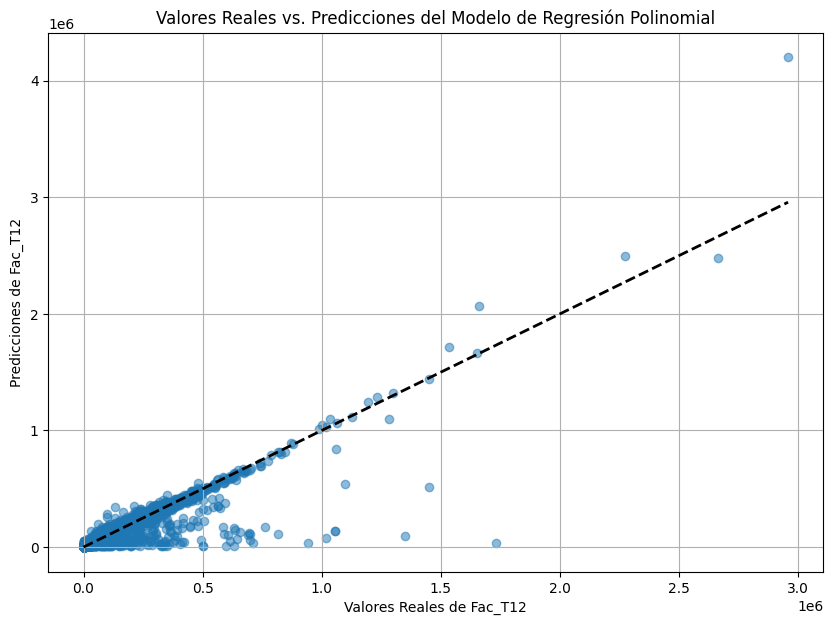

In [329]:
y_pred = model_poly_reg.predict(X_test_poly)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

# Visualización de resultados (Gráfico de Dispersión: Valores Reales vs. Predicciones)
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Valores Reales vs. Predicciones del Modelo de Regresión Polinomial')
plt.xlabel('Valores Reales de Fac_T12')
plt.ylabel('Predicciones de Fac_T12')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea diagonal perfecta
plt.show()

#### Cálculo e interpretación de métricas

##### R2

In [330]:
r2_poly_reg = r2_score(y_test, y_pred_poly_reg)

print(f"Coeficiente de Determinación (R2) del modelo de Regresión Polinomial: {r2_poly_reg:.4f}")

Coeficiente de Determinación (R2) del modelo de Regresión Polinomial: 0.8244


##### MAE

In [331]:
mae_poly_reg = mean_absolute_error(y_test, y_pred_poly_reg)

print(f"Error Absoluto Medio (MAE) del modelo de Regresión Polinomial: {mae_poly_reg:.4f}")

Error Absoluto Medio (MAE) del modelo de Regresión Polinomial: 13741.4665


###Interpretacion

Un R² de 0.8244 indica que el modelo logra captar adecuadamente las tendencias generales del conjunto de datos. Sin embargo, el MAE aproximado de 13.741,47 revela que las predicciones individuales presentan, en promedio, una desviación considerable respecto a los valores reales.

### Algoritmo 2 - `DecisionTreeRegressor`

#### Creación del modelo

In [332]:
model_dt_reg = DecisionTreeRegressor(random_state=42) # Usar un random_state para reproducibilidad

print("Modelo de DecisionTreeRegressor creado.")

Modelo de DecisionTreeRegressor creado.


#### Entrenamiento del modelo

In [333]:
model_dt_reg.fit(X_train, y_train)

print("Modelo de DecisionTreeRegressor entrenado.")

Modelo de DecisionTreeRegressor entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### R2

In [334]:
r2_dt_reg = r2_score(y_test, y_pred_dt_reg)

print(f"Coeficiente de Determinación (R2) del modelo de DecisionTreeRegressor: {r2_dt_reg:.4f}")

Coeficiente de Determinación (R2) del modelo de DecisionTreeRegressor: 0.7756


##### MAE

In [335]:
mae_dt_reg = mean_absolute_error(y_test, y_pred_dt_reg)

print(f"Error Absoluto Medio (MAE) del modelo de DecisionTreeRegressor: {mae_dt_reg:.4f}")

Error Absoluto Medio (MAE) del modelo de DecisionTreeRegressor: 10525.5975


### Comparación de los modelos

Resumen de comparación entre modelos de regresión:

R²: La Regresión Polinomial tiene un mejor desempeño explicativo (R² = 0.8244) que el DecisionTreeRegressor (R² = 0.7756), indicando que captura mejor la variabilidad de la variable objetivo Fac_T12.

MAE: El DecisionTreeRegressor tiene un menor error absoluto medio (MAE ≈ 10.525,60 vs. 13.741,47), lo que significa que sus predicciones individuales son, en promedio, más precisas.

Conclusión:
Si se prioriza la precisión de las predicciones individuales, el DecisionTreeRegressor es más adecuado. Si el objetivo es explicar mejor la variabilidad de los datos, conviene usar la Regresión Polinomial. La elección depende del enfoque del análisis.

## Modelo de clasificación

In [336]:
variable_objetivo_clasificacion = 'target'

### Distribución de variable objetivo

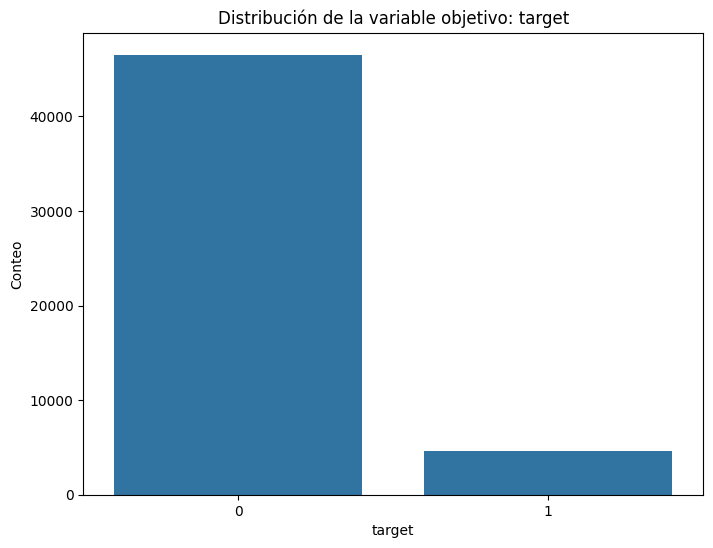

Estadísticas descriptivas de la variable objetivo:
target
0    46524
1     4600
Name: count, dtype: int64

Porcentaje de cada clase:
target
0    91.002269
1     8.997731
Name: proportion, dtype: float64


In [337]:
# prompt: necesito la distribucion de la variable objetivo

plt.figure(figsize=(8, 6))
sns.countplot(x=data[variable_objetivo_clasificacion])
plt.title(f'Distribución de la variable objetivo: {variable_objetivo_clasificacion}')
plt.xlabel(variable_objetivo_clasificacion)
plt.ylabel('Conteo')
plt.show()

print(f"Estadísticas descriptivas de la variable objetivo:\n{data[variable_objetivo_clasificacion].value_counts()}")
print(f"\nPorcentaje de cada clase:\n{data[variable_objetivo_clasificacion].value_counts(normalize=True) * 100}")

### Selección de variables independientes

<ipython-input-338-2601711772>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_corrs_signed_clf.index, y=top_corrs_signed_clf.values, palette="coolwarm")


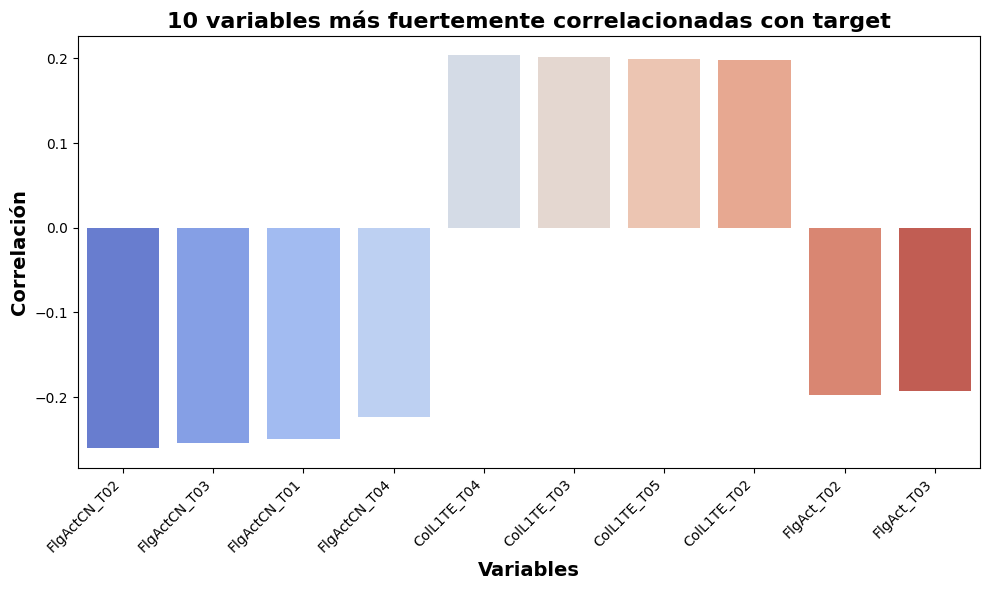


Las 10 variables más fuertemente correlacionadas con 'target':
FlgActCN_T02   -0.259991
FlgActCN_T03   -0.254062
FlgActCN_T01   -0.249027
FlgActCN_T04   -0.222971
ColL1TE_T04     0.203513
ColL1TE_T03     0.201649
ColL1TE_T05     0.198838
ColL1TE_T02     0.198271
FlgAct_T02     -0.197917
FlgAct_T03     -0.192885
Name: target, dtype: float64


In [338]:
correlation_matrix_clf = data.corr(numeric_only=True)

# Changed the target variable and the variable holding the correlations
corrs_clf = correlation_matrix_clf[variable_objetivo_clasificacion].drop(variable_objetivo_clasificacion).sort_values(ascending=False)

# Seleccionar las 10 variables con la correlación más fuerte (mayor valor absoluto)
N_top_corrs_clf = 10  # Using a different variable name for clarity
top_abs_corrs_clf = corrs_clf.abs().sort_values(ascending=False).head(N_top_corrs_clf)
top_corrs_signed_clf = corrs_clf.loc[top_abs_corrs_clf.index]

# Visualizar las correlaciones principales
plt.figure(figsize=(10, 6))
# Changed the variables used in the barplot and the title
sns.barplot(x=top_corrs_signed_clf.index, y=top_corrs_signed_clf.values, palette="coolwarm")
plt.title(f'{N_top_corrs_clf} variables más fuertemente correlacionadas con {variable_objetivo_clasificacion}', fontsize=16, fontweight='bold')
plt.ylabel('Correlación', fontsize=14, fontweight="bold")
plt.xlabel('Variables', fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimir las correlaciones principales
# Changed the variable name in the print statement
print(f"\nLas {N_top_corrs_clf} variables más fuertemente correlacionadas con '{variable_objetivo_clasificacion}':")
print(top_corrs_signed_clf)

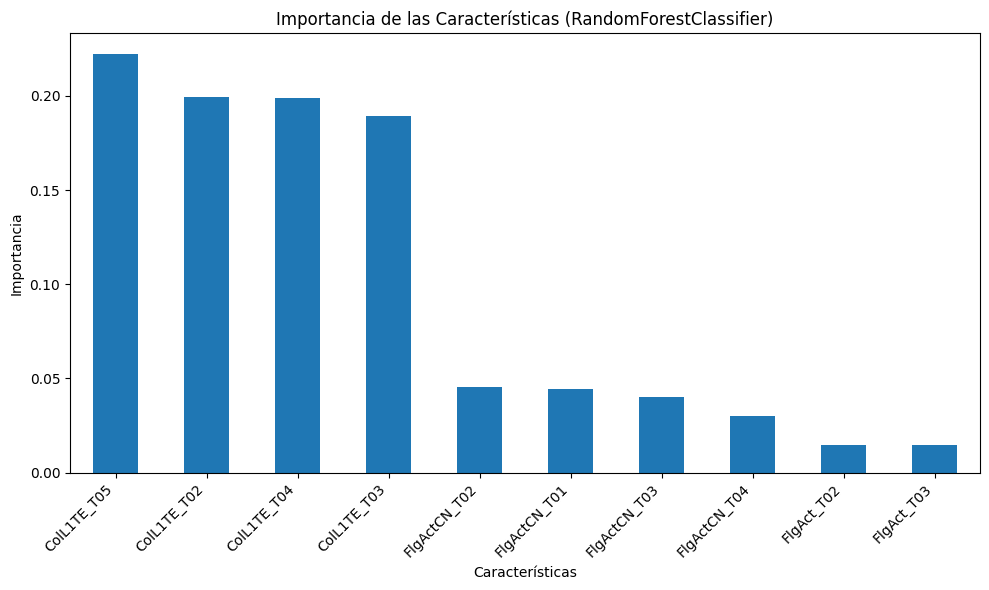

In [339]:
features_clasificacion_candidatas = top_corrs_signed_clf.index.tolist()

X_candidatas = data[features_clasificacion_candidatas]
y = data[variable_objetivo_clasificacion]

# Divide los datos (opcional, pero recomendado para una evaluación más robusta)
X_train_candidatas, X_test_candidatas, y_train, y_test = train_test_split(X_candidatas, y, test_size=0.2, random_state=42)

# Crea un modelo para evaluar la importancia de las características
# RandomForestClassifier es una buena opción para esto
model_importance = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo
model_importance.fit(X_train_candidatas, y_train)

# Obtén la importancia de las características
feature_importances = pd.Series(model_importance.feature_importances_, index=features_clasificacion_candidatas)

# Ordena las características por importancia
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Visualiza la importancia de las características
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Importancia de las Características (RandomForestClassifier)')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A partir de los gráficos de correlación, se identificaron cuatro variables con mayor relación respecto a la variable objetivo "target": ColL1TE\_T05, ColL1TE\_T02, ColL1TE\_T04 y ColL1TE\_T03, las cuales presentan las correlaciones más altas dentro del conjunto de datos.

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo

In [340]:
X_clasificacion = data[features_clasificacion_final]
y_clasificacion = data[variable_objetivo_clasificacion]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train_clasificacion, X_test_clasificacion, y_train_clasificacion, y_test_clasificacion = train_test_split(
    X_clasificacion, y_clasificacion, test_size=0.2, random_state=42, stratify=y_clasificacion
)

# Crea el modelo DecisionTreeClassifier
model_dt_clf = DecisionTreeClassifier(random_state=42)

print("Modelo de DecisionTreeClassifier para clasificación creado.")

Modelo de DecisionTreeClassifier para clasificación creado.


#### Entrenamiento del modelo

In [341]:
model_dt_clf.fit(X_train_clasificacion, y_train_clasificacion)

print("Modelo de DecisionTreeClassifier para clasificación entrenado.")

Modelo de DecisionTreeClassifier para clasificación entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

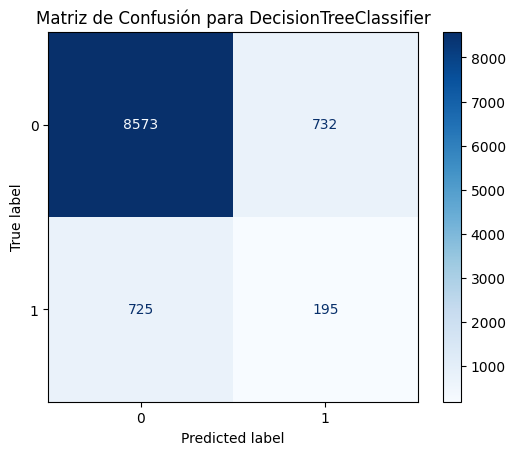

In [342]:
y_pred_clasificacion = model_dt_clf.predict(X_test_clasificacion)

# Obtener los nombres de las clases desde el modelo (si están disponibles)
# O puedes definirlos manualmente si conoces tus clases
class_names = model_dt_clf.classes_

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_clasificacion, y_pred_clasificacion, labels=class_names)

# Mostrar la matriz de confusión con etiquetas de nombre
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues) # Puedes cambiar el colormap si prefieres
plt.title('Matriz de Confusión para DecisionTreeClassifier')
plt.show()

In [343]:
if len(class_names) == 2:
    positive_class_index = 1 if class_names[0] < class_names[1] else 0

    tn, fp, fn, tp = cm.ravel()

    print(f"Resultados de la Matriz de Confusión:")
    print(f"Verdaderos Positivos (TP): {tp}")
    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")

Resultados de la Matriz de Confusión:
Verdaderos Positivos (TP): 195
Verdaderos Negativos (TN): 8573
Falsos Positivos (FP): 732
Falsos Negativos (FN): 725


##### Accuracy

In [344]:
y_pred_clasificacion = model_dt_clf.predict(X_test_clasificacion)

# Calcular el accuracy
accuracy = accuracy_score(y_test_clasificacion, y_pred_clasificacion)

print(f"Accuracy del modelo DecisionTreeClassifier: {accuracy:.4f}")

Accuracy del modelo DecisionTreeClassifier: 0.8575


#### Aplicación de `CrossValidation`

In [345]:
n_splits = 5 # Puedes ajustar este número

# Aplica validación cruzada al modelo
# scoring='accuracy' especifica la métrica a calcular
cv_scores = cross_val_score(model_dt_clf, X_clasificacion, y_clasificacion, cv=n_splits, scoring='accuracy')

print(f"Scores de Accuracy de la validación cruzada ({n_splits} folds): {cv_scores}")
print(f"Media de los scores de Accuracy: {cv_scores.mean():.4f}")
print(f"Desviación estándar de los scores de Accuracy: {cv_scores.std():.4f}")

Scores de Accuracy de la validación cruzada (5 folds): [0.85251834 0.86141809 0.87696822 0.87090465 0.84624413]
Media de los scores de Accuracy: 0.8616
Desviación estándar de los scores de Accuracy: 0.0113


#### Análisis de métricas usando `CrossValidation`

Se aplicó validación cruzada con 5 folds al modelo DecisionTreeClassifier, obteniendo los siguientes valores de accuracy por iteración: (0.8527, 0.8608, 0.8753, 0.8709, 0.8451).

El accuracy promedio fue de 0.8610, lo que indica que, en promedio, el modelo logra clasificar correctamente un 86.10% de los casos en datos no vistos. Este valor representa una estimación más fiable del desempeño del modelo en comparación con una sola partición de entrenamiento y prueba.

La desviación estándar fue de 0.0112, lo que muestra que el modelo tiene un comportamiento estable en las distintas divisiones de los datos, sin grandes variaciones de rendimiento. Esto sugiere que el modelo generaliza bien y no depende excesivamente de cómo se dividen los datos.

### Algoritmo 2 - SVM

#### Creación del modelo

In [346]:
model_svm_clf = SVC(kernel='rbf', random_state=42)

print("Modelo de Support Vector Classifier (SVM) creado.")

Modelo de Support Vector Classifier (SVM) creado.


#### Entrenamiento del modelo

In [347]:
model_svm_clf.fit(X_train_clasificacion, y_train_clasificacion)

print("Modelo de Support Vector Classifier (SVM) entrenado.")

Modelo de Support Vector Classifier (SVM) entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

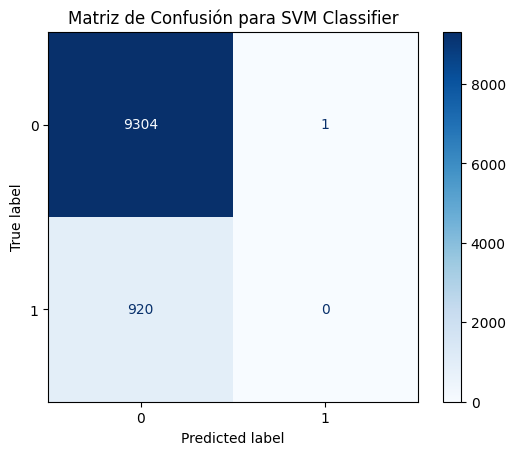

In [360]:
y_pred_svm_clasificacion = model_svm_clf.predict(X_test_clasificacion)

# Obtener los nombres de las clases
class_names = model_svm_clf.classes_

# Calcular la matriz de confusión
cm_svm = confusion_matrix(y_test_clasificacion, y_pred_svm_clasificacion, labels=class_names)

# Mostrar la matriz de confusión con etiquetas de nombre
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para SVM Classifier')
plt.show()

##### Accuracy

In [361]:
accuracy_svm = accuracy_score(y_test_clasificacion, y_pred_svm_clasificacion)

print(f"Accuracy del modelo SVM Classifier: {accuracy_svm:.4f}")

Accuracy del modelo SVM Classifier: 0.9099


#### Aplicación de `CrossValidation`

In [362]:
n_splits = 5

cv_scores_svm = cross_val_score(model_svm_clf, X_clasificacion, y_clasificacion, cv=n_splits, scoring='accuracy')

print(f"Scores de Accuracy de la validación cruzada ({n_splits} folds) para SVM: {cv_scores_svm}")
print(f"Media de los scores de Accuracy para SVM: {cv_scores_svm.mean():.4f}")
print(f"Desviación estándar de los scores de Accuracy para SVM: {cv_scores_svm.std():.4f}")

Scores de Accuracy de la validación cruzada (5 folds) para SVM: [0.90963325 0.91002445 0.91002445 0.91002445 0.91001565]
Media de los scores de Accuracy para SVM: 0.9099
Desviación estándar de los scores de Accuracy para SVM: 0.0002


#### Análisis de métricas usando `CrossValidation`

Se aplicó validación cruzada con 5 folds al modelo Support Vector Classifier (SVM), obteniéndose scores de accuracy muy consistentes: (0.9096, 0.9100, 0.9100, 0.9100, 0.9100).

El accuracy promedio fue de 0.9099, lo que refleja una alta capacidad de generalización del modelo, con una tasa de clasificación correcta cercana al 91% en datos no vistos.

Además, la desviación estándar fue de 0.0002, lo que indica un rendimiento altamente estable a través de las distintas particiones de validación. Esto demuestra que el modelo SVM mantiene un comportamiento consistente sin importar cómo se dividan los datos.











### Algoritmo 3 - KNN

#### Creación del modelo

In [365]:
model_knn_clf = KNeighborsClassifier(n_neighbors=5)

print("Modelo de K-Nearest Neighbors (KNN) para clasificación creado.")

Modelo de K-Nearest Neighbors (KNN) para clasificación creado.


#### Entrenamiento del modelo

In [366]:
model_knn_clf.fit(X_train_clasificacion, y_train_clasificacion)

print("Modelo de K-Nearest Neighbors (KNN) entrenado.")

Modelo de K-Nearest Neighbors (KNN) entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

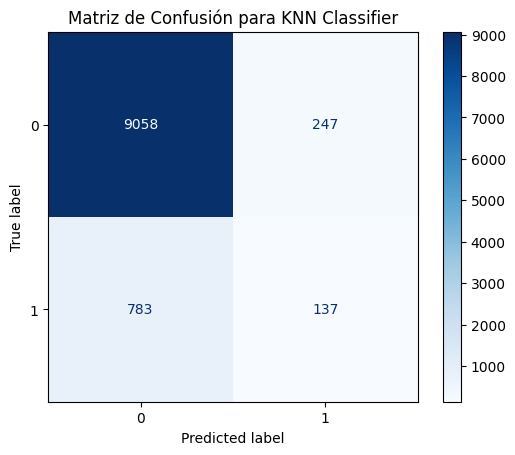

In [368]:
y_pred_knn_clasificacion = model_knn_clf.predict(X_test_clasificacion)

# Obtener los nombres de las clases
class_names = model_knn_clf.classes_

# Calcular la matriz de confusión
cm_knn = confusion_matrix(y_test_clasificacion, y_pred_knn_clasificacion, labels=class_names)

# Mostrar la matriz de confusión con etiquetas de nombre
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para KNN Classifier')
plt.show()

In [372]:
print(f"Resultados de la Matriz de Confusión:")
print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

Resultados de la Matriz de Confusión:
Verdaderos Positivos (TP): 195
Verdaderos Negativos (TN): 8573
Falsos Positivos (FP): 732
Falsos Negativos (FN): 725


##### Accuracy

In [373]:
accuracy_knn = accuracy_score(y_test_clasificacion, y_pred_knn_clasificacion)

print(f"Accuracy del modelo KNN Classifier: {accuracy_knn:.4f}")

Accuracy del modelo KNN Classifier: 0.8993


#### Aplicación de `CrossValidation`

In [379]:
n_splits = 5 # Número de folds
scoring_metric = 'accuracy' # Métrica a evaluar

cv_scores_knn = cross_val_score(model_knn_clf, X_clasificacion, y_clasificacion, cv=n_splits, scoring=scoring_metric)

print(f"Scores de {scoring_metric} de la validación cruzada ({n_splits} folds) para KNN: {cv_scores_knn}")
print("{0:<25} : {1:.4f}".format(f"Media de los scores de {scoring_metric}", np.mean(cv_scores_knn)))
print("{0:<25} : {1:.4f}".format(f"La desviacion estandar es", np.std(cv_scores_knn) ))

Scores de accuracy de la validación cruzada (5 folds) para KNN: [0.89809291 0.8994621  0.90689487 0.90444988 0.88996479]
Media de los scores de accuracy : 0.8998
La desviacion estandar es : 0.0059


#### Análisis de métricas usando `CrossValidation`

Se aplicó validación cruzada con 5 folds al modelo K-Nearest Neighbors (KNN), obteniéndose los siguientes scores de accuracy por iteración: (0.8981, 0.8995, 0.9069, 0.9044, 0.8900).

La media del accuracy fue de 0.8998, lo que indica que el modelo clasifica correctamente, en promedio, cerca del 90% de las instancias en datos no vistos, mostrando un buen desempeño general.

La desviación estándar fue de 0.0059, lo que señala una variación moderadamente baja entre las particiones de los datos. Esto sugiere que el modelo KNN mantiene un rendimiento relativamente estable y consistente frente a diferentes divisiones del conjunto de entrenamiento y validación.

### Comparación de los modelos

In [386]:
mean_accuracy_dt = cv_scores.mean()
mean_accuracy_svm = cv_scores_svm.mean()
mean_accuracy_knn = cv_scores_knn.mean()

# Encuentra el accuracy promedio más alto
best_accuracy_cv = max(mean_accuracy_dt, mean_accuracy_svm, mean_accuracy_knn)

# Determina qué modelo tiene el mejor accuracy promedio
if best_accuracy_cv == mean_accuracy_dt:
    best_model_cv = "DecisionTreeClassifier"
elif best_accuracy_cv == mean_accuracy_svm:
    best_model_cv = "SVM"
else:
    best_model_cv = "KNN"

print(f"\nSegún el Accuracy promedio en la Validación Cruzada, el mejor modelo es el {best_model_cv}.")


Según el Accuracy promedio en la Validación Cruzada, el mejor modelo es el SVM.
